### About

#### Build a machine learning model that predicts the Envision Racing drivers’ lap times.

### Import the necessary packages.

In [ ]:
!pip install -U klib

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
import re
import klib # visualization
%matplotlib inline
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [141]:
train=pd.read_csv("/content/gdrive/MyDrive/dare_in_reality_hackathon_2021/train.csv")
test=pd.read_csv("/content/gdrive/MyDrive/dare_in_reality_hackathon_2021/test.csv")

### Import weather dataset

In [5]:
train_weather=pd.read_csv("/content/gdrive/MyDrive/dare_in_reality_hackathon_2021/train_weather.csv")
test_weather=pd.read_csv("/content/gdrive/MyDrive/dare_in_reality_hackathon_2021/test_weather.csv")

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NUMBER                       10276 non-null  int64  
 1   DRIVER_NUMBER                10276 non-null  int64  
 2   LAP_NUMBER                   10276 non-null  int64  
 3   LAP_TIME                     10276 non-null  int64  
 4   LAP_IMPROVEMENT              10276 non-null  int64  
 5   CROSSING_FINISH_LINE_IN_PIT  1234 non-null   object 
 6   S1                           10272 non-null  float64
 7   S1_IMPROVEMENT               10276 non-null  int64  
 8   S2                           10268 non-null  float64
 9   S2_IMPROVEMENT               10276 non-null  int64  
 10  S3                           10242 non-null  float64
 11  S3_IMPROVEMENT               10276 non-null  int64  
 12  KPH                          10246 non-null  float64
 13  ELAPSED         

#### The above information shows that there are 10276 data entries and 25 columns.

#### The target column is **LAP_TIME**.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        420 non-null    int64  
 1    DRIVER_NUMBER                420 non-null    int64  
 2    LAP_NUMBER                   420 non-null    int64  
 3   LAP_TIME                      0 non-null      float64
 4    LAP_IMPROVEMENT              420 non-null    int64  
 5    CROSSING_FINISH_LINE_IN_PIT  16 non-null     object 
 6    S1                           420 non-null    object 
 7    S1_IMPROVEMENT               420 non-null    int64  
 8    S2                           420 non-null    object 
 9    S2_IMPROVEMENT               420 non-null    int64  
 10   S3                           418 non-null    object 
 11   S3_IMPROVEMENT               420 non-null    int64  
 12   KPH                          418 non-null    float64
 13   ELAP

#### The above information shows that there are 420 data entries and 25 columns.


#### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

NUMBER                            0
DRIVER_NUMBER                     0
LAP_NUMBER                        0
LAP_TIME                          0
LAP_IMPROVEMENT                   0
CROSSING_FINISH_LINE_IN_PIT    9042
S1                                4
S1_IMPROVEMENT                    0
S2                                8
S2_IMPROVEMENT                    0
S3                               34
S3_IMPROVEMENT                    0
KPH                              30
ELAPSED                           0
HOUR                              0
S1_LARGE                          4
S2_LARGE                          8
S3_LARGE                         34
DRIVER_NAME                       0
PIT_TIME                       8378
GROUP                          9768
TEAM                              0
POWER                          7373
LOCATION                          0
EVENT                             0
dtype: int64

In [ ]:
test.isnull().sum()

NUMBER                            0
 DRIVER_NUMBER                    0
 LAP_NUMBER                       0
LAP_TIME                        420
 LAP_IMPROVEMENT                  0
 CROSSING_FINISH_LINE_IN_PIT    404
 S1                               0
 S1_IMPROVEMENT                   0
 S2                               0
 S2_IMPROVEMENT                   0
 S3                               2
 S3_IMPROVEMENT                   0
 KPH                              2
 ELAPSED                          0
 HOUR                             0
S1_LARGE                          0
S2_LARGE                          0
S3_LARGE                          2
DRIVER_NAME                       0
PIT_TIME                        265
GROUP                            29
TEAM                              0
POWER                           111
LOCATION                          0
EVENT                             0
dtype: int64

#### The above information shows that there are some missing values.

#### Let's see the glimpse of train dataset

In [ ]:
train.head(3)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,92,0,NaN,343.003,0,35.427,0,43.313,0,28.8,422.000,1322.000,343.003,35.004,43.003,SB,314.007,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,41.922,2,120.5,523.000,1423.000,25.007,33.004,41.009,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,57.248,0,101.9,642.005,1542.005,28.001,34.001,57.002,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2


### Structure of the weather dataset.

In [ ]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIME_UTC_SECONDS  914 non-null    int64 
 1   TIME_UTC_STR      914 non-null    object
 2   AIR_TEMP          914 non-null    object
 3   TRACK_TEMP        914 non-null    object
 4   HUMIDITY          914 non-null    object
 5   PRESSURE          914 non-null    object
 6   WIND_SPEED        914 non-null    object
 7   WIND_DIRECTION    914 non-null    int64 
 8   RAIN              914 non-null    object
 9   LOCATION          914 non-null    object
 10  EVENT             914 non-null    object
dtypes: int64(2), object(9)
memory usage: 78.7+ KB


#### The above information shows that there are 914 data entries and 11 columns.

In [ ]:
test_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIME_UTC_SECONDS  167 non-null    int64 
 1   TIME_UTC_STR      167 non-null    object
 2   AIR_TEMP          167 non-null    object
 3   TRACK_TEMP        167 non-null    object
 4   HUMIDITY          167 non-null    object
 5   PRESSURE          167 non-null    object
 6   WIND_SPEED        167 non-null    object
 7   WIND_DIRECTION    167 non-null    int64 
 8   RAIN              167 non-null    int64 
 9   LOCATION          167 non-null    object
 10  EVENTS            167 non-null    object
dtypes: int64(3), object(8)
memory usage: 14.5+ KB


### The above information shows that there are 167 data entries and 11 columns.

#### Let's see is there any missing values in weather dataset by column wise.

In [ ]:
train_weather.isnull().sum()

TIME_UTC_SECONDS    0
TIME_UTC_STR        0
AIR_TEMP            0
TRACK_TEMP          0
HUMIDITY            0
PRESSURE            0
WIND_SPEED          0
WIND_DIRECTION      0
RAIN                0
LOCATION            0
EVENT               0
dtype: int64

In [ ]:
test_weather.isnull().sum()

TIME_UTC_SECONDS    0
TIME_UTC_STR        0
AIR_TEMP            0
TRACK_TEMP          0
HUMIDITY            0
PRESSURE            0
WIND_SPEED          0
WIND_DIRECTION      0
RAIN                0
LOCATION            0
EVENTS              0
dtype: int64

#### The above information shows that there are no missing values.

#### Let's see the glimpse of train weather dataset

In [ ]:
train_weather.head(3)

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1618042506,10/04/21 8:15,15,18.4,60,1018.05,2.12187,165,-1,Location 2,Free Practice 2
1,1618042567,10/04/21 8:16,15.0556,18.4,60,1018.12,1.06093,177,-1,Location 2,Free Practice 2
2,1618042632,10/04/21 8:17,15.0556,18.5,60,1018.12,2.12187,157,-1,Location 2,Free Practice 2


#### In train dataset some column's(**S1, S2, S3, S1_LARGE, S2_LARGE, S3_LARGE, HOUR**) values are represented in the time format.The following formats are used,

### * **min:sec.microseconds**
### * **min:sec**
### * **sec.microseconds**
### * **microseconds**


#### Before analyzing these columns the values should be formatted in a single format. So let's convert these column values to seconds.

#### In train weather some column's(**AIR_TEMP, TRACK_TEMP, HUMIDITY, PRESSURE,WIND_SPEED**) values are represented in the mixed number format.In the following types number are represented,

### * **22,55,55**
### * **25,55**
### * **25.25**
### * **25**


#### Before analyzing these columns the values should be formatted in a single format. So let's convert these column values to float type.

### Let's create class called Prepare_Data and creat a member function for preprocess the columns.The member functions are,

### **seconds_convert** (convert the mixed time format columns to single format.)

### **num_clean** (convert the mixed numerical format columns to single float format.)

### **clean** (apply the seconds_convert function to dataframe columns.)

### **date_feat_eng** (extract the new feature from date column.)

### **num_feat_eng** (extract the new feature from numerical column.) 


In [10]:
class Prepare_data():
  def seconds_convert(col):
    if col:
      pat1 = re.compile(r"(^\d+\:\d+\.\d+$)")
      pat2 = re.compile(r"(^\d+\:\d+$)")
      pat3 = re.compile(r"(^\d+\.\d+$)")
      pat4 = re.compile(r"(^\d+$)")
      pat5 = re.compile(r"([^0-9]+)")
      col=str(col)
      col=col.strip()
      if pat1.match(col):
        col=col.replace(":",".")
        m,s,ms=map(float,col.split("."))
        return (m*60)+s+(ms/1000) 
      elif pat2.match(col):
        col=col.replace(":",".")
        m,s=map(float,col.split("."))
        return (m*60)+s 
      elif pat3.match(col):
        s,ms=map(float,col.split("."))
        return s+(ms/1000) 
      elif pat4.fullmatch(col):
        return int(col)/1000 
      elif pat5.match(col):
        return np.nan
    else:
      return np.nan
  def num_clean(col):
    if col: 
      pat1 = re.compile(r"(^\d+\,\d+\,\d+$)")
      pat2 = re.compile(r"(^\d+\,\d+$)")
      pat3 = re.compile(r"(^\d+\.\d+$)")
      pat4 = re.compile(r"(^\d+$)")
      col=str(col)
      col=col.strip()
      if pat1.match(col):
        col=col.replace(",","")
        col=col.strip()
        v1=int(str(col)[:2])
        v2=int(str(col)[2:4])
        v2=v2/100
        return v1+v2
      elif pat2.match(col):
        col=col.replace(",",".")
        return pd.to_numeric(col)
      elif pat3.match(col):
        return pd.to_numeric(col)
      elif pat4.fullmatch(col):
        return pd.to_numeric(col)
    else:
      return np.nan
  def clean(df,col,type):
    if type=="time":
      df.rename(columns={col:col.strip() for col in df.columns.values},inplace=True)
      for i in col:
        for miss in df.columns[df.isnull().any()].values:
          df[i]=df[i].apply(Prepare_data.seconds_convert)
          df[miss+"_NA"]=df[miss].isnull().astype('int')
      return df
    elif type=="number":
      for i in col:
        df[i]=df[i].apply(Prepare_data.num_clean)
      return df
  def date_feat_eng(df,datecol):
    df[datecol]=pd.to_datetime(df[datecol])
    df['day']=df[datecol].dt.day
    df['day_label']=df[datecol].dt.day_name()
    df['day_number']=df[datecol].dt.dayofweek
    df['month_number']= df[datecol].dt.month
    df['month_label']= df[datecol].dt.strftime('%b')
    df['year_quarter']=df[datecol].dt.quarter
    df['week_of_year']=df[datecol].dt.week
    df['year']=df[datecol].dt.year
    return df
  def num_feat_eng(df,grpcol,numcol):
    for col in numcol:
      df1=(df[df[col]>0].groupby(grpcol)[col].
      agg({'min','median','max'}).reset_index())
      df1=df1.rename(columns={c:col+'_'+c for c in df1.loc[:,df1.columns.str.match("(min|median|max)")]})
      df=pd.merge(df,df1,on=grpcol,how='left')
    return df    


### Let's apply the created funtion to columns.

#### First apply the seconds_convert function to train dataset columns(**S1, S2, S3, ELAPSED, HOUR, S1_LARGE, S2_LARGE,S3_LARGE, PIT_TIME**).

In [ ]:
train_new=Prepare_data.clean(train,col=['S1', 'S2', 'S3', 'ELAPSED', 'HOUR', 'S1_LARGE',
                                        'S2_LARGE','S3_LARGE', 'PIT_TIME'],type="time")

### Let's perform some exploratory data analysis and see the distribution type of each column.

### Let's check the distrutionof target column(**LAP_TIME**).

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


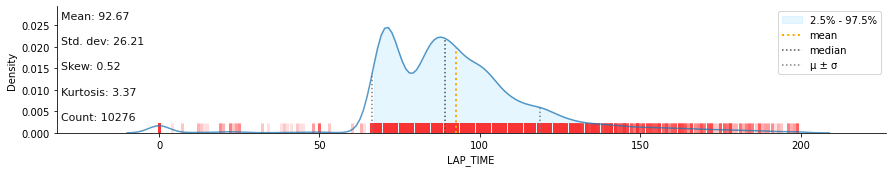

In [ ]:
_=klib.dist_plot(train['LAP_TIME'])

### Let's create a fuction to display a boxplot.

In [ ]:
def box_plot(df,col,title=''):
    _=plt.figure(figsize=(8,8))
    _=sns.boxplot(y=df[col])
    _=plt.title(title,fontsize=25)
    _=plt.ylabel(col,fontsize=20)
    _=plt.yticks(fontsize=14)

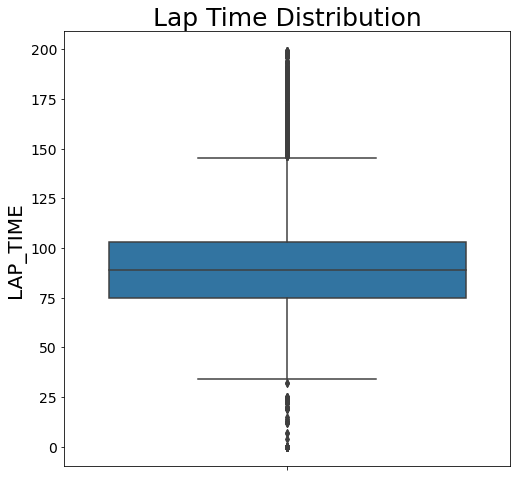

In [ ]:
box_plot(train,'LAP_TIME','Lap Time Distribution')

In [ ]:
train['LAP_TIME'].describe()

count    10276.000000
mean        92.670884
std         26.206425
min          0.000000
25%         75.000000
50%         89.000000
75%        103.000000
max        199.000000
Name: LAP_TIME, dtype: float64

#### The above histogram explains that the LAP_TIME column is looks normally distributed.But there are two peeks(mode) are there.

#### The lap time range from 0 to 199 seconds.

#### The average lap time is 92.7.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.


### Let's do a quick plot for all numerical column in the train dataset.Visualition by using processed train data.

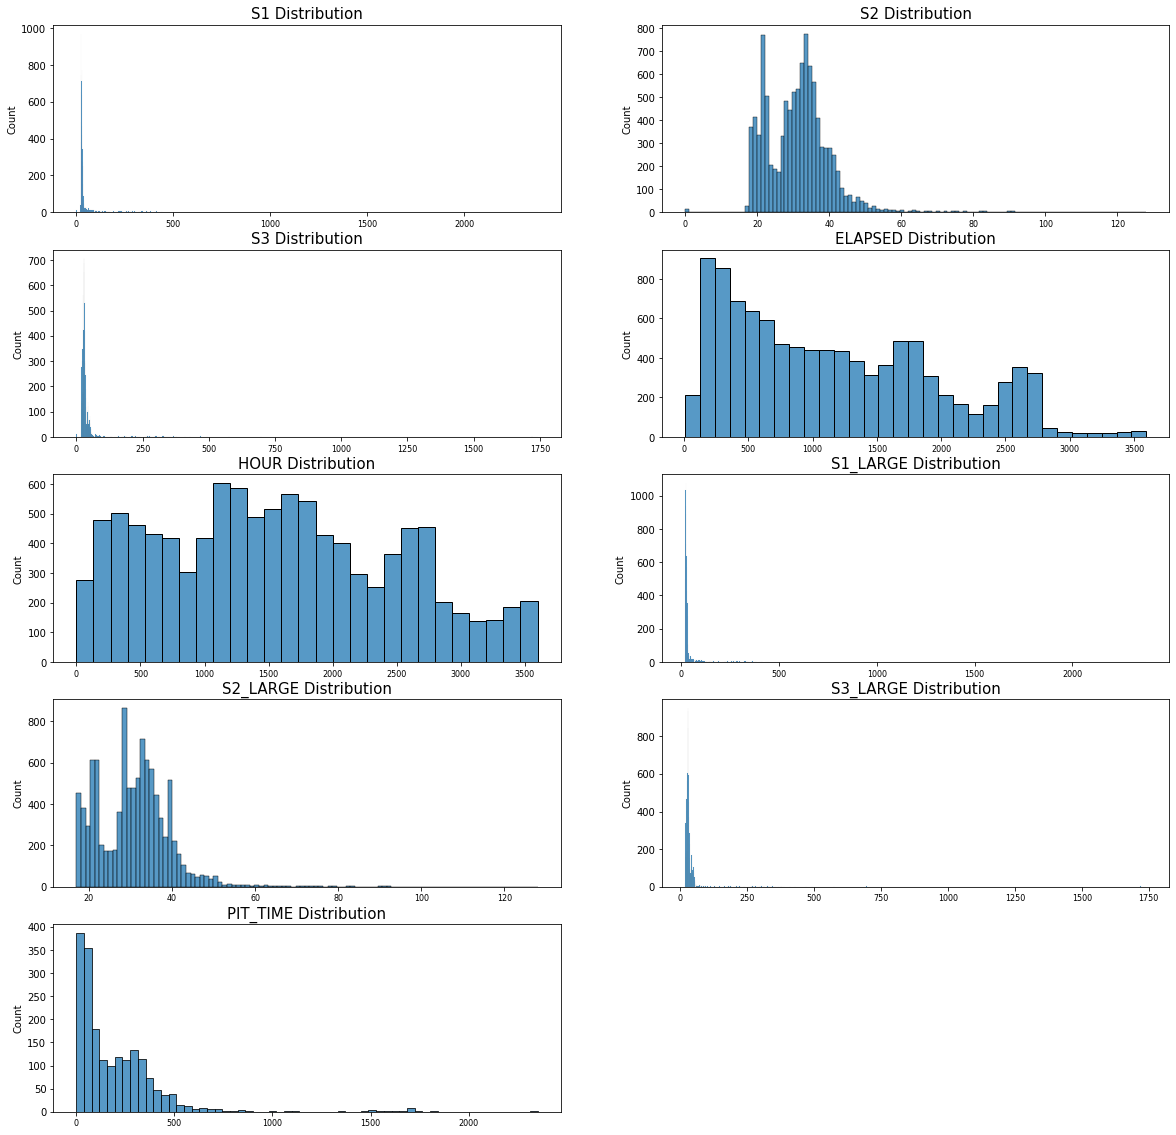

In [ ]:
fig=plt.subplots(figsize=(20, 20))
for i,col in enumerate(train_new.loc[:,['S1', 'S2', 'S3', 'ELAPSED', 'HOUR', 'S1_LARGE', 'S2_LARGE','S3_LARGE', 'PIT_TIME']].columns.values):
  plt.subplot(5,2,i+1)
  _=sns.histplot(data=train_new,x=col)
  _=plt.title(col+' Distribution',fontsize=15)
  _=plt.xlabel("")
  _=plt.xticks(fontsize=8)

plt.show()    

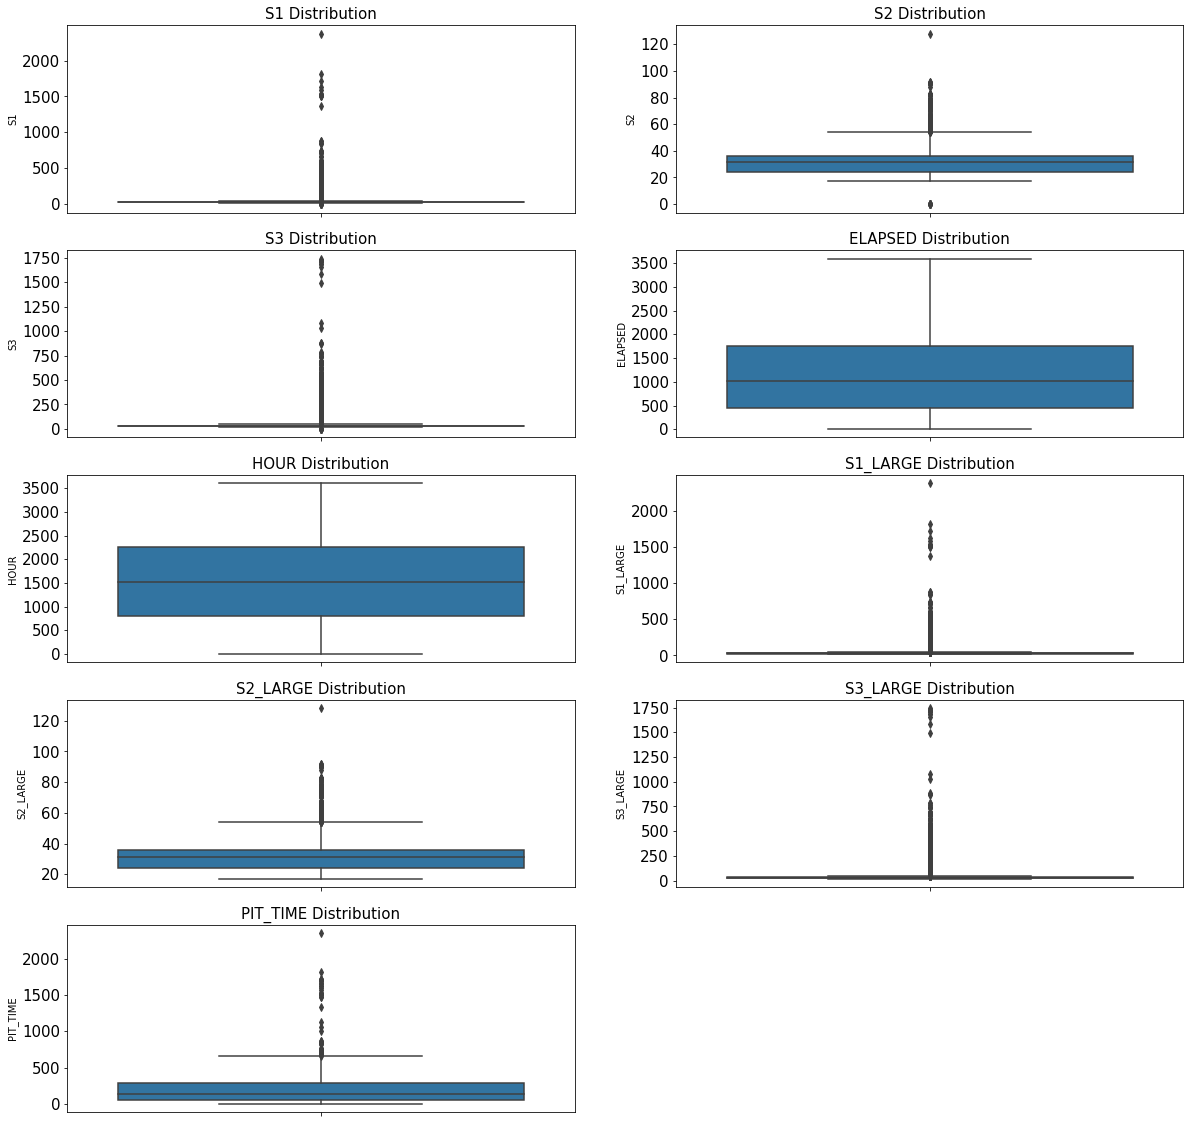

In [ ]:
fig=plt.subplots(figsize=(20, 20))
for i,col in enumerate(train_new.loc[:,['S1', 'S2', 'S3', 'ELAPSED', 'HOUR', 'S1_LARGE', 'S2_LARGE','S3_LARGE', 'PIT_TIME']].columns.values):
  plt.subplot(5,2,i+1)
  _=sns.boxplot(y=train_new[col])
  _=plt.title(col+' Distribution',fontsize=15)
  _=plt.ylabel(col,fontsize=10)
  _=plt.yticks(fontsize=15)

plt.show()    

#### The above histogram explains that distributions of the columns S1, S2, S3 and S1 LARGE, S2 LARGE, S3 LARGE are the same respectively.

#### The above boxplot explains that there are outliers in all columns except ELAPSED, HOUR columns.

### Let's create a function to show categorical level count.

In [ ]:
def cat_plot(df,catcol,title=''):
  plt.figure(figsize=(15,6))
  _=sns.countplot(df[catcol],order=df[catcol].value_counts().index)
  _=plt.title(title,fontsize=25)
  _=plt.xlabel(catcol,fontsize=15)
  _=plt.xticks(fontsize=10, rotation=90)

### Let's see the driver's name and see how many records available for each name.

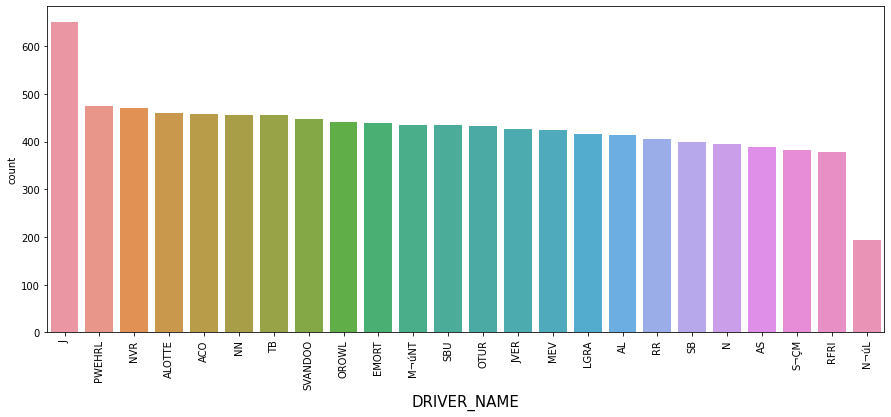

In [ ]:
cat_plot(train,'DRIVER_NAME')

In [ ]:
train['DRIVER_NAME'].value_counts()

J          651
PWEHRL     475
NVR        470
ALOTTE     460
ACO        457
NN         456
TB         455
SVANDOO    448
OROWL      441
EMORT      438
M¬úNT      435
SBU        434
OTUR       433
JVER       426
MEV        425
LGRA       416
AL         413
RR         405
SB         400
N          394
AS         388
S¬ÇM       383
RFRI       379
N¬úL       194
Name: DRIVER_NAME, dtype: int64

#### The driver name **J** occured more number of times.

### Let's see the what are the teams in the race.

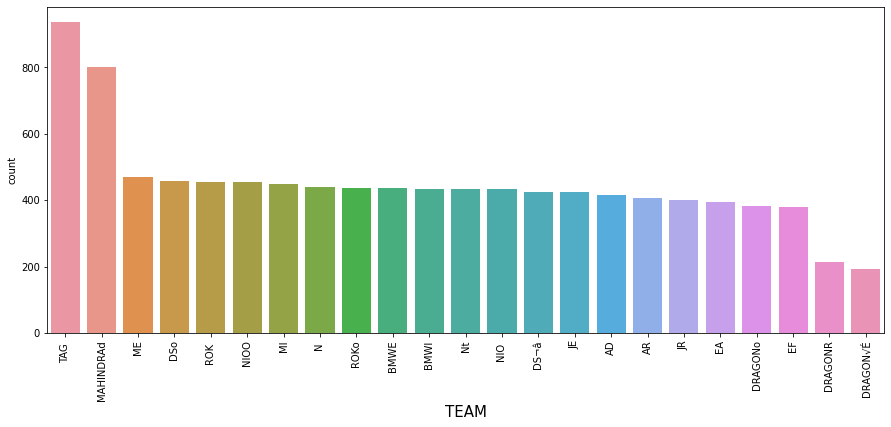

In [ ]:
cat_plot(train,"TEAM")

In [ ]:
train['TEAM'].value_counts()

TAG          935
MAHINDRAd    801
ME           470
DSo          457
ROK          456
NIOO         455
Ml           448
N            441
ROKo         438
BMWE         438
BMWl         435
Nt           434
NIO          433
DS¬â         426
JE           425
AD           416
AR           405
JR           400
EA           394
DRAGONo      383
EF           379
DRAGONR      213
DRAGON√É     194
Name: TEAM, dtype: int64

### Let's see in which location most number of race conducted.

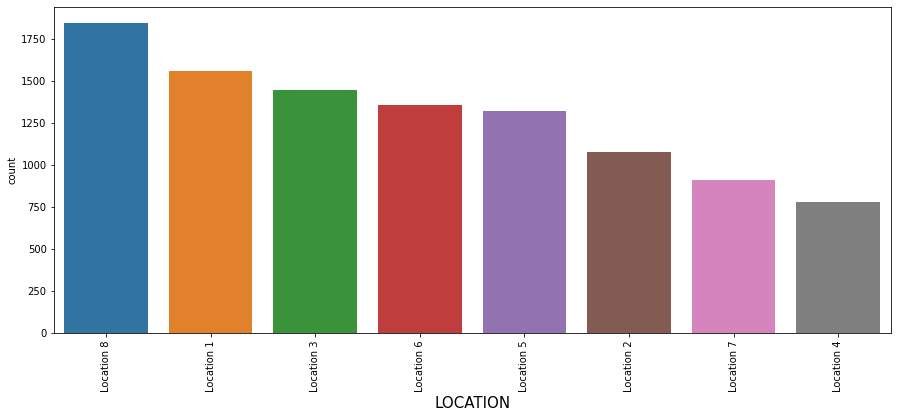

In [ ]:
cat_plot(train,"LOCATION")

#### Most number of race conducted in **Location 8**.

### Let's see which type of race event is mostly conducted.

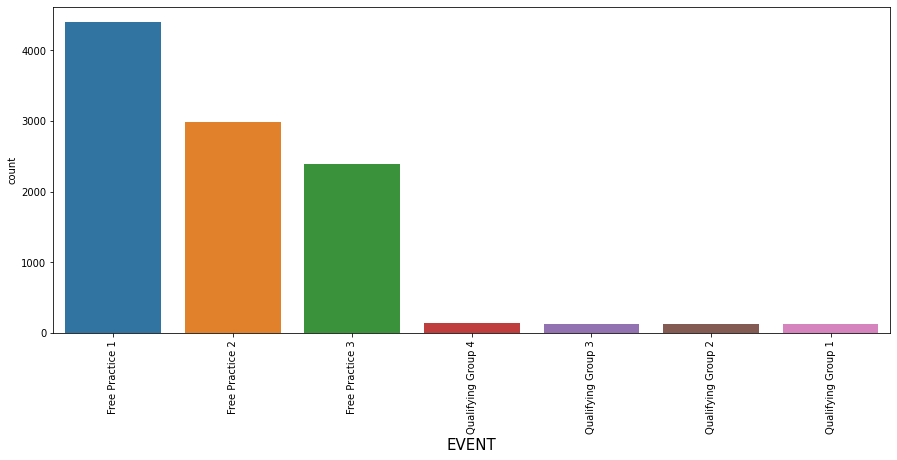

In [ ]:
cat_plot(train,"EVENT")

#### **Free Practice** race events are conducted more number of times.

### Let's explore train weather data.

#### Train weather column values are represented in mixed number format so let's use num_clean function to clean the data.

In [ ]:
train_weather_new=Prepare_data.clean(train_weather,col=['AIR_TEMP', 'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED','WIND_DIRECTION'],
                                         type="number")

### Let's also create new feature from date-time column by applying function date_feat_eng.

In [ ]:
train_weather_new=Prepare_data.date_feat_eng(train_weather_new,datecol="TIME_UTC_STR")

### Let's do a quick plot for all numerical column in the train weather dataset.Visualization by using processed train weather data.

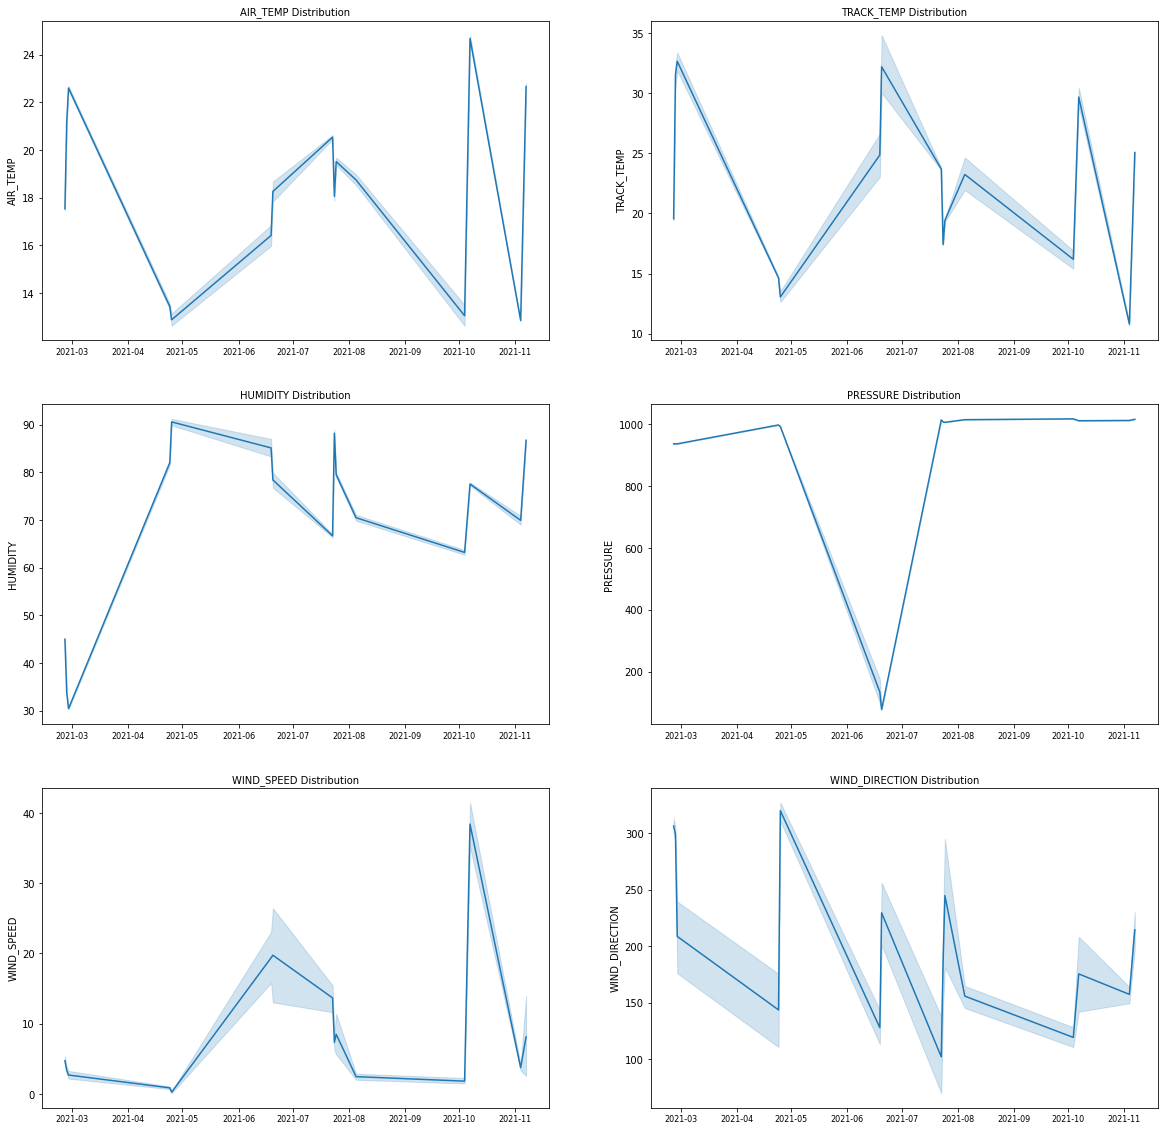

In [ ]:
fig=plt.subplots(figsize=(20, 20))
for i,col in enumerate(train_weather_new.loc[:,['AIR_TEMP', 'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED','WIND_DIRECTION']].columns.values):
  plt.subplot(3,2,i+1)
  _=sns.lineplot(data=train_weather_new,x=train_weather_new['TIME_UTC_STR'].dt.date,y=col)
  _=plt.title(col+' Distribution',fontsize=10)
  _=plt.xlabel("")
  _=plt.xticks(fontsize=8)

plt.show()    

In [ ]:
train_weather_new['TIME_UTC_STR'].describe()

count                     914
unique                    914
top       2021-06-19 13:50:00
freq                        1
first     2021-02-25 15:15:00
last      2021-11-07 13:57:00
Name: TIME_UTC_STR, dtype: object

In [ ]:
train_weather_new['day'].unique()

array([ 4, 27, 25, 20,  7, 24, 23,  5, 19, 26])

#### The train weather data are available from the date 25 Feb 2021 to 07 november 2021.From february to november the weather data recorded on these days(4, 27, 25, 20,  7, 24, 23,  5, 19, 26).


In [ ]:
pd.to_datetime(test_weather['TIME_UTC_STR']).describe()

count                     167
unique                    167
top       2021-08-13 15:05:00
freq                        1
first     2021-08-13 15:00:00
last      2021-08-15 09:57:00
Name: TIME_UTC_STR, dtype: object

#### The test weather data recorded for the month Aug 2021.

### For easy pre-processing combine the train weather and test weather data.

#### The test weather dataset has a column name called **EVENT**. But test weather data has **EVENTS**. Let's change the test weather data column name from **EVENTS** to **EVENT** to avoid unnecessary issues while merging.

In [ ]:
test_weather=test_weather.rename(columns={'EVENTS':'EVENT'})

In [12]:
weather=pd.concat([train_weather,test_weather],axis=0)

#### Now apply the clean and date_feat_eng, num_feat_eng function the merged dataframe.

In [13]:
#Clean the numerical column
weather=Prepare_data.clean(weather,col=['AIR_TEMP', 'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED','WIND_DIRECTION'],
                                         type="number")
#Feature engineering for date
weather=Prepare_data.date_feat_eng(weather,datecol="TIME_UTC_STR")

#Get the weather information by location extract from it.
weather=Prepare_data.num_feat_eng(weather,grpcol=["LOCATION"],numcol=['AIR_TEMP', 'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED','WIND_DIRECTION'])


### Let's see the processed data.

In [ ]:
weather.head(3)

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year,AIR_TEMP_median,AIR_TEMP_max,AIR_TEMP_min,TRACK_TEMP_median,TRACK_TEMP_max,TRACK_TEMP_min,HUMIDITY_median,HUMIDITY_max,HUMIDITY_min,PRESSURE_median,PRESSURE_max,PRESSURE_min,WIND_SPEED_median,WIND_SPEED_max,WIND_SPEED_min,WIND_DIRECTION_median,WIND_DIRECTION_max,WIND_DIRECTION_min
0,1618042506,2021-10-04 08:15:00,15.0000,18.4,60.0,1018.05,2.12187,165,-1,Location 2,Free Practice 2,4,Monday,0,10,Oct,4,40,2021,12.9444,15.3333,9.77778,12.0,21.0,10.2,65.0,78.0,60.0,1017.61,1018.39,1012.63,3.1828,8.48747,1.06093,149.0,208,56
1,1618042567,2021-10-04 08:16:00,15.0556,18.4,60.0,1018.12,1.06093,177,-1,Location 2,Free Practice 2,4,Monday,0,10,Oct,4,40,2021,12.9444,15.3333,9.77778,12.0,21.0,10.2,65.0,78.0,60.0,1017.61,1018.39,1012.63,3.1828,8.48747,1.06093,149.0,208,56
2,1618042632,2021-10-04 08:17:00,15.0556,18.5,60.0,1018.12,2.12187,157,-1,Location 2,Free Practice 2,4,Monday,0,10,Oct,4,40,2021,12.9444,15.3333,9.77778,12.0,21.0,10.2,65.0,78.0,60.0,1017.61,1018.39,1012.63,3.1828,8.48747,1.06093,149.0,208,56


### Select the extracted numerical features by location and drop the duplicate values.

In [14]:
weather=weather.iloc[:,np.r_[9,11,14,18,19:37,8]].drop_duplicates()

### Some location has  multiple records for a day so let's filter and single row.

In [15]:
weather=weather.groupby(['LOCATION']).head(1)

### Convert the rain column to numerical one.

In [16]:
weather['RAIN']=pd.to_numeric(weather['RAIN'])

### The weather data has now ready.Let's prepare the train and test data.

### For easy processing let's merge the train and test data.

### Before that let's create indicator to indicate whether the data from train or test dataframe.

In [142]:
train['data']="train"
test['data']="test"

### Let's clean the train and test data

In [143]:
train=Prepare_data.clean(train,col=['S1', 'S2', 'S3', 'ELAPSED', 'HOUR',
                                        'S1_LARGE', 'S2_LARGE','S3_LARGE', 'PIT_TIME'],type="time")
test=Prepare_data.clean(test,col=['S1', 'S2', 'S3', 'ELAPSED', 'HOUR',
                                        'S1_LARGE', 'S2_LARGE','S3_LARGE', 'PIT_TIME'],type="time")

### Combine the train and test data.

In [144]:
fulldata=pd.concat([train,test],axis=0)

### Extract the numerical feature from full data.

In [145]:
fulldata=Prepare_data.num_feat_eng(fulldata,grpcol=['LOCATION','DRIVER_NAME','EVENT','TEAM'],
                                    numcol=['S1', 'S2', 'S3', 'ELAPSED',
                                            'HOUR', 'S1_LARGE', 'S2_LARGE','S3_LARGE'])

### Let's see newly created feature in full data.

In [146]:
fulldata.head(2)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT,data,CROSSING_FINISH_LINE_IN_PIT_NA,S1_NA,S2_NA,S3_NA,KPH_NA,S1_LARGE_NA,S2_LARGE_NA,S3_LARGE_NA,PIT_TIME_NA,GROUP_NA,POWER_NA,HOUR_NA,LAP_TIME_NA,S1_median,S1_min,S1_max,S2_median,S2_min,S2_max,S3_median,S3_min,S3_max,ELAPSED_median,ELAPSED_min,ELAPSED_max,HOUR_median,HOUR_min,HOUR_max,S1_LARGE_median,S1_LARGE_min,S1_LARGE_max,S2_LARGE_median,S2_LARGE_min,S2_LARGE_max,S3_LARGE_median,S3_LARGE_min,S3_LARGE_max
0,10,1,1,92.0,0,NaN,343.003,0,35.427,0,43.313,0,28.8,422.0,1322.0,343.003,35.004,43.003,SB,314.007,NaN,JR,NaN,Location 2,Free Practice 2,train,1,0.0,0.0,0,0,0.0,0.0,0,0,1,1,0,NaN,28.129,25.674,343.003,34.091,33.399,35.427,43.313,41.922,57.248,523.0,422.0,642.005,1423.0,1322.0,1542.005,28.001,25.007,343.003,34.001,33.004,35.004,43.003,41.009,57.002
1,10,1,2,87.0,2,NaN,25.674,2,33.399,2,41.922,2,120.5,523.0,1423.0,25.007,33.004,41.009,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,train,1,0.0,0.0,0,0,0.0,0.0,0,1,1,1,0,NaN,28.129,25.674,343.003,34.091,33.399,35.427,43.313,41.922,57.248,523.0,422.0,642.005,1423.0,1322.0,1542.005,28.001,25.007,343.003,34.001,33.004,35.004,43.003,41.009,57.002


### Now check the missing value columns.

In [147]:
fulldata.columns[fulldata.isnull().any()].values

array(['LAP_TIME', 'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S2', 'S3', 'KPH',
       'HOUR', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'PIT_TIME', 'GROUP',
       'POWER', 'S1_NA', 'S2_NA', 'S1_LARGE_NA', 'S2_LARGE_NA',
       'LAP_TIME_NA'], dtype=object)

In [148]:
fulldata['POWER'].value_counts()

250.0    2298
235.0     914
Name: POWER, dtype: int64

### The power column contains only two unique values.Let's fill the median of two unique values to the missing rows.

In [149]:
fulldata['POWER']=fulldata['POWER'].fillna(245.28)

### The KPH column has 30 missing values. Let's fill the missing value by using the grouped mean of the kph column.

In [150]:
fulldata['KPH'] = fulldata['KPH'].fillna(fulldata.groupby(['DRIVER_NAME','LOCATION','EVENT','TEAM'])['KPH'].transform('mean'))

In [151]:
fulldata['HOUR'] = fulldata['HOUR'].fillna(fulldata.groupby(['DRIVER_NAME','LOCATION','EVENT','TEAM'])['HOUR'].transform('mean'))

### Let's check the missing value columns. 

In [152]:
fulldata.columns[fulldata.isnull().any()].values

array(['LAP_TIME', 'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S2', 'S3',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'PIT_TIME', 'GROUP', 'S1_NA',
       'S2_NA', 'S1_LARGE_NA', 'S2_LARGE_NA', 'LAP_TIME_NA'], dtype=object)

### The columns CROSSING_FINISH_LINE_IN_PIT, DRIVER_NUMBER,PIT_TIME,GROUP have missing values more than 80%.So Let's drop these columns from the data frame and also remove its missing indicator columns.

### The DRIVER_NUMBER column has the same value for all the rows. So Let's also remove this column.

In [153]:
fulldata=fulldata.drop(columns=['CROSSING_FINISH_LINE_IN_PIT','DRIVER_NUMBER','PIT_TIME',"GROUP",
'CROSSING_FINISH_LINE_IN_PIT_NA','PIT_TIME_NA',"GROUP_NA"])

### Stil some column have missing values.So let's fill those missing value by 0.

In [154]:
fulldata=fulldata.fillna(0)

### Let's join the weather data with processed fulldata.

In [155]:
fulldata=pd.merge(fulldata,weather.iloc[:,np.r_[0,5:23]],on=['LOCATION'],how='left')

### Let's split the train and test data.

In [116]:
train1=fulldata[fulldata['data']=='train']
test1=fulldata[fulldata['data']=='test']

### Let's create a catboost regressor model with optuna hyperparemeter optimization.

In [ ]:
pip install optuna

In [ ]:
pip install catboost

### Import Necessary Packages

In [107]:
from sklearn.model_selection import  cross_val_score,KFold,train_test_split,ShuffleSplit
from catboost import CatBoostRegressor,Pool,cv
import optuna
from optuna.samplers import RandomSampler,TPESampler
from sklearn.metrics import mean_squared_log_error,make_scorer
from xgboost import XGBRegressor
from optuna.integration import XGBoostPruningCallback

In [157]:
train1['LAP_TIME'].describe()

count    10276.000000
mean        92.670884
std         26.206425
min          0.000000
25%         75.000000
50%         89.000000
75%        103.000000
max        199.000000
Name: LAP_TIME, dtype: float64

### The LAP_TIME target column contains 0.Let's filter target value greater than 0.

In [117]:
train2=train1[train1['LAP_TIME']>0]

### Split predictor and target variables.

In [118]:
X=train2.iloc[:,np.r_[1,3:21,22:31,32:74]]
y=train2['LAP_TIME']

### The evaluation metric is RMSLE.Let's create a function to get the rmsle.

In [92]:
def loss(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))


### Define the model

In [119]:
def objective(trial):
  #train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size=0.3)
  #train_data=Pool(train_x,train_y,cat_features=['Artist Name'])  
  skf = KFold(n_splits=10,random_state=22,shuffle=True)
  for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    param = {
        #"objective": trial.suggest_categorical("objective", ["MultiClass"]),
        'reg_lambda':trial.suggest_categorical('reg_lambda',[0.1, 1.0, 5.0, 10.0, 50.0, 100.0,150.0,200.0,250.0]),
        
        'learning_rate': trial.suggest_float('learning_rate', 0.001,1.0),
        'n_estimators': trial.suggest_categorical('n_estimators',[100,150,200,250,300,350,400,500,600]),
        'max_depth': trial.suggest_int('max_depth', 2,12),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
        "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        #"used_ram_limit": "3gb",
        }
  if param["bootstrap_type"] == "Bayesian":
    param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
  elif param["bootstrap_type"] == "Bernoulli":
    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

  cat_clf = CatBoostRegressor(early_stopping_rounds=50,
                               logging_level="Silent",
                              **param)
  cat_clf.fit(X_train, y_train,cat_features=['LOCATION','EVENT','DRIVER_NAME','TEAM']
              )
  preds = cat_clf.predict(X_valid)
  accuracy = loss(y_valid, preds)
  return accuracy
  


if __name__ == "__main__":
    study = optuna.create_study(direction='minimize',sampler=TPESampler(),
           pruner=optuna.pruners.ThresholdPruner(lower=0.0))
    study.optimize(objective, n_trials=100)
    print('Number of finished trials:', len(study.trials))
    print('Best trial:', study.best_trial.params)  

[I 2021-11-29 08:34:55,210] A new study created in memory with name: no-name-8ae6e25f-66a2-4151-8648-90a662ac2976
[I 2021-11-29 08:34:59,227] Trial 0 finished with value: 0.2243213350125229 and parameters: {'reg_lambda': 150.0, 'learning_rate': 0.3670679988490466, 'n_estimators': 150, 'max_depth': 12, 'random_state': 48, 'colsample_bylevel': 0.06143157114029771, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.2243213350125229.
[I 2021-11-29 08:35:00,441] Trial 1 finished with value: 0.2371490039811968 and parameters: {'reg_lambda': 5.0, 'learning_rate': 0.7689424303867268, 'n_estimators': 600, 'max_depth': 4, 'random_state': 48, 'colsample_bylevel': 0.08488011013601934, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.12584665240617773}. Best is trial 0 with value: 0.2243213350125229.
[I 2021-11-29 08:35:02,200] Trial 2 finished with value: 0.2244123269015998 and parameters: {'reg_lambda': 1.0, 'learning_rate': 0.2624630698869466

Number of finished trials: 100
Best trial: {'reg_lambda': 50.0, 'learning_rate': 0.25652540015320224, 'n_estimators': 200, 'max_depth': 3, 'random_state': 48, 'colsample_bylevel': 0.09536196163890051, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6821135197706077}


### The best score from study

In [123]:
study.best_value

0.22159993835783448

### Visualizing the Optimization History - Explains the best score at each trails.

In [124]:
optuna.visualization.plot_optimization_history(study)

### Visualizing High-dimensional Parameter Relationships

In [126]:
optuna.visualization.plot_slice(study)

### Visualizing Parameter Importances

In [128]:
optuna.visualization.plot_param_importances(study)

### Create a model with new parameters

In [129]:
model = CatBoostRegressor(**study.best_params,early_stopping_rounds=10)

### Fit the model

In [ ]:
model.fit(X,y,cat_features=['LOCATION','EVENT','DRIVER_NAME','TEAM'])

### Import shap for model explaination

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

In [134]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=['LOCATION','EVENT','DRIVER_NAME','TEAM']))

### Feature importance plot.

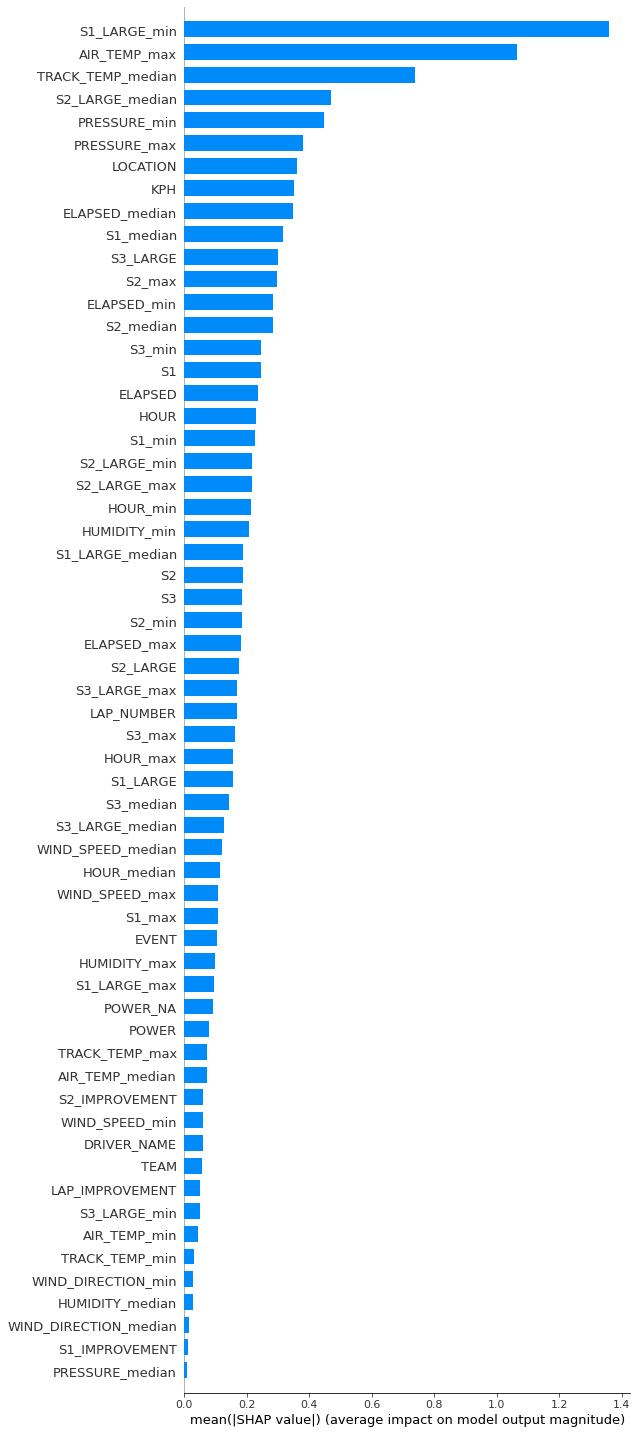

In [136]:
shap.summary_plot(shap_values, X, plot_type="bar" ,max_display=60)

### Top features impact the model

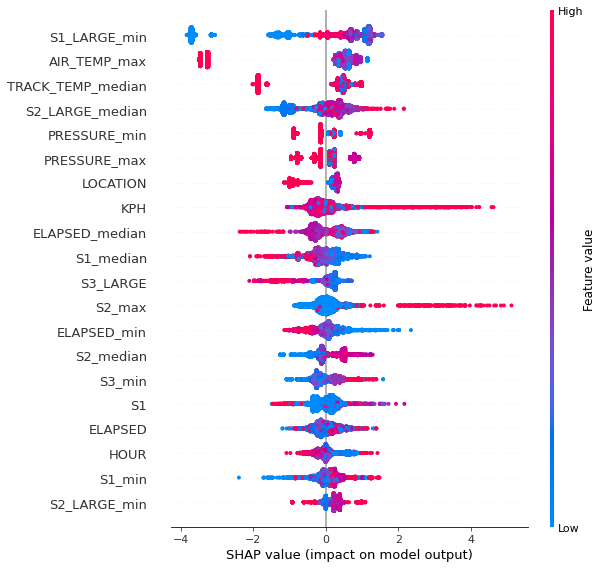

In [137]:
shap.summary_plot(shap_values,X)

### Let's see which feature influences the model prediction for a single observation. 

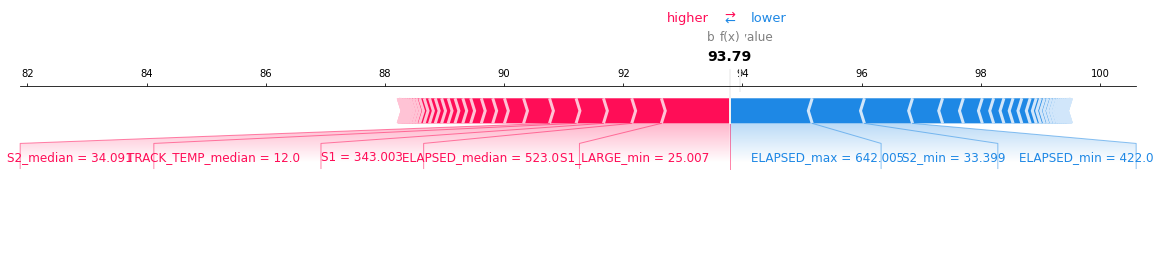

In [138]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=True)

### Predict the test data

In [159]:
res=model.predict(test1.iloc[:,np.r_[1,3:21,22:31,32:74]])

### Create submission dataframe.

In [160]:
sub=pd.DataFrame({'LAP_TIME':res})

### Write the dataframe as csv file

In [161]:
sub.to_csv("Catboost Regressor with optuna.csv",index=False)